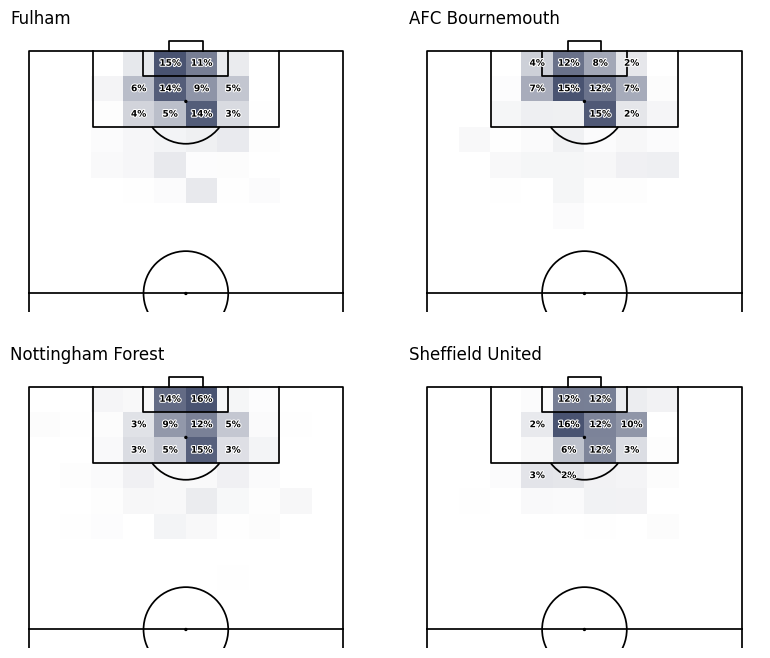

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from mplsoccer import VerticalPitch

df = pd.read_csv("C:/Users/Tomlo/OneDrive/Documents/Py/efl_championship_shots_07022022-2.csv", index_col = 0)

def soc_pitch_divisions(ax, grids = False):
    pitch = VerticalPitch(pitch_type = "uefa", half = True, goal_type='box', linewidth = 1.25, line_color='black')

    pitch.draw(ax = ax)

    if grids:
        y_lines = [105 - 5.5*x for x in range(1,10)]
        x_lines = [68 - 6.8*x for x in range(1,10)]
        #ls = linestyle, lw = linewidth
        for i in x_lines:
            ax.plot([i, i], [45, 105], color = "lightgray", ls = "--", lw = 0.75, zorder = -1)
        for j in y_lines:
            ax.plot([68, 0], [j, j], color = "lightgray", ls = "--", lw = 0.75, zorder = -1)

    return ax

df = df[df["date"] >= "2021-08-06"].reset_index(drop = True)
df.rename(columns = {"x":"y", "y":"x"}, inplace = True)

y_bins = [105] + [105 - 5.5*x for x in range(1,10)] + [45]
x_bins = [68] + [68 - 6.8*x for x in range(1,10)] + [0]

x_bins.sort()
y_bins.sort()

df["bins_x"] = pd.cut(df["x"], bins = x_bins)
df["bins_y"] = pd.cut(df["y"], bins = y_bins)

df_teams = (df.groupby(["bins_x", "bins_y", "teamName", "teamId", "teamColor"], observed = True)["xGOT"].sum().reset_index())

df_teams = (df_teams.sort_values(by = ["bins_y", "bins_x"]).reset_index(drop = True))

def soc_xGOT_plot(ax, grids, teamName, data = df_teams):
    df = data.copy()
    df = data[data["teamName"] == teamName]
    total_xGOT = df["xGOT"].sum()

    df = (df.assign(xGOT_share = lambda x: x.xGOT/total_xGOT))
    df = (df.assign(xGOT_scaled = lambda x: x.xGOT_share/x.xGOT_share.max()))

    soc_pitch_divisions(ax, grids = grids)

    counter = 0
    for X, Y in zip(df["bins_x"], df["bins_y"]):
        ax.fill_between(x = [X.left, X.right], y1 = Y.left, y2 = Y.right, color = "#495371",
        alpha = df["xGOT_scaled"].iloc[counter], zorder = -1, lw = 0)

        if df['xGOT_share'].iloc[counter] > .02:
            text_ = ax.annotate(xy = (X.right - (X.right - X.left)/2, Y.right - (Y.right - Y.left)/2),
                text = f"{df['xGOT_share'].iloc[counter]:.0%}", ha = "center", va = "center", color = "black",
                size = 6.5, weight = "bold", zorder = 3)
            text_.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground="white"), path_effects.Normal()])

        counter += 1
    
    return ax

fig = plt.figure(figsize=(12, 8), dpi = 100)

ax_1 = plt.subplot(221)
ax_2 = plt.subplot(222)
ax_3 = plt.subplot(223)
ax_4 = plt.subplot(224)
#ax_5 = plt.subplot(225)
#ax_6 = plt.subplot(226)
#ax_7 = plt.subplot(227)
#ax_8 = plt.subplot(228)
#ax_9 = plt.subplot(229)
#ax_10 = plt.subplot(230)
#ax_11 = plt.subplot(231)
#ax_12 = plt.subplot(232)
#ax_13 = plt.subplot(233)
#ax_14 = plt.subplot(234)
#ax_15 = plt.subplot(235)
#ax_16 = plt.subplot(236)
#ax_17 = plt.subplot(237)
#ax_18 = plt.subplot(238)
#ax_19 = plt.subplot(239)
#ax_20 = plt.subplot(240)
#ax_21 = plt.subplot(241)
#ax_22 = plt.subplot(242)
#ax_23 = plt.subplot(243)
#ax_24 = plt.subplot(244)


soc_xGOT_plot(ax_1, False, 'Fulham', data = df_teams)
soc_xGOT_plot(ax_2, False, 'AFC Bournemouth', data = df_teams)
soc_xGOT_plot(ax_3, False, 'Nottingham Forest', data = df_teams)
soc_xGOT_plot(ax_4, False, 'Sheffield United', data = df_teams)

ax_1.set_title("Fulham", loc = 'left')
ax_2.set_title("AFC Bournemouth", loc = 'left')
ax_3.set_title("Nottingham Forest", loc = 'left')
ax_4.set_title("Sheffield United", loc = 'left')

plt.subplots_adjust(wspace = -.25)
